# Check the movement

In [1]:
from typing import Tuple

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from param import *
from modules.dataloader import UniformSegmentDataset, BaseDataset
from modules.utils.util import cal_velocity, segment_with_threshold
from modules.utils.plot_utils import label_diff

data_list = ParamDir().data_list

## Median time of staying in one position

In [8]:
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]

segment_len_all = []
for mouse_id, data_dir in enumerate(KO_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)

    segment_ind = segment(dataset.y_train_base)
    segment_len.append(round((segment_ind[0]+1)/3, 2))
    for i in range(1, len(segment_ind)):
        segment_len.append(round((segment_ind[i]-segment_ind[i-1])/3, 2))
    segment_len_all.append([segment_len, mouse_id])
    

pass_res_KO = []
not_pass_res_KO = []
for item in segment_len_all:
    if item[1]+1 in [1]:
        pass_res_KO.extend(item[0])
    else:
        not_pass_res_KO.extend(item[0])


WT_ids = [1, 2, 4] # mice that didnot pass
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]

segment_len_all = []
for mouse_id, data_dir in enumerate(WT_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.load_all_data(ParamData().window_size, ParamData().K, ParamData().train_ratio)

    segment_ind = segment(dataset.y_train_base)
    segment_len.append(round((segment_ind[0]+1)/3, 2))
    for i in range(1, len(segment_ind)):
        segment_len.append(round((segment_ind[i]-segment_ind[i-1])/3, 2))
    segment_len_all.append([segment_len, mouse_id])
    

pass_res_WT = []
not_pass_res_WT = []
for item in segment_len_all:
    if item[1]+1 not in WT_ids:
        pass_res_WT.extend(item[0])
    else:
        not_pass_res_WT.extend(item[0])


Text(0.5, 0.98, 'median time (s) of staying in one position')

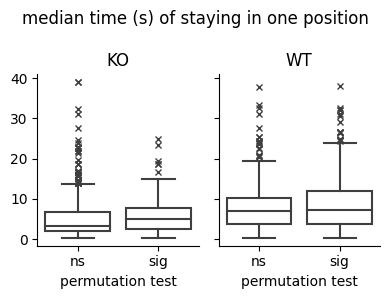

In [9]:
fig, axes = plt.subplots(figsize=(4,3), ncols=2, sharey=True, tight_layout=True)
sns.despine()

sns.boxplot([not_pass_res_KO, pass_res_KO], 
            ax=axes[0],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
axes[0].set_title("KO")
axes[0].set_xticklabels(["ns", "sig"])
axes[0].set_xlabel("permutation test")

sns.boxplot([not_pass_res_WT, pass_res_WT], 
            ax=axes[1],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
axes[1].set_title("WT")
axes[1].set_xticklabels(["ns", "sig"])
axes[1].set_xlabel("permutation test")

plt.suptitle("median time (s) of staying in one position")

## Average velocity throught the whole trial

In [32]:
KO_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" in  str(data_dir).split('/')[-1]]

pass_res_KO = []
not_pass_res_KO = []
for mouse_id, data_dir in enumerate(KO_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    (X_train, y_train), (X_test, y_test) = dataset.split_data(dataset.spikes, dataset.coords_xy, ParamData().train_ratio)

    vel_base = cal_velocity(y_train)

    if mouse_id+1 in [1]:
        pass_res_KO.extend(vel_base)
    else:
        not_pass_res_KO.extend(vel_base)

WT_ids = [1, 2, 4] # mice that didnot pass
WT_data_list = [data_dir for data_dir in ParamDir().data_list if "KO" not in  str(data_dir).split('/')[-1]]

pass_res_WT = []
not_pass_res_WT = []
for mouse_id, data_dir in enumerate(WT_data_list):
    segment_len = []
    data_name = str(data_dir).split('/')[-1]
    dataset = UniformSegmentDataset(data_dir, ParamData().mobility, ParamData().shuffle, ParamData().random_state)
    vel_base = dataset.vel_base

    if mouse_id+1 in WT_ids:
        not_pass_res_WT.extend(vel_base)
    else:
        pass_res_WT.extend(vel_base)


In [33]:
stats.ttest_ind(pass_res_KO, not_pass_res_KO)

Ttest_indResult(statistic=-4.603642687110232, pvalue=4.189740990643926e-06)

In [34]:
stats.ttest_ind(pass_res_WT, not_pass_res_WT)

Ttest_indResult(statistic=7.032751858431156, pvalue=2.0593673877168805e-12)

Text(0.5, 0.98, 'velocity (cm/s) within the training set')

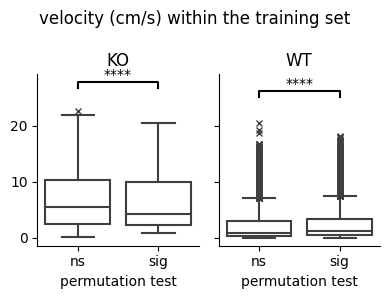

In [31]:
fig, axes = plt.subplots(figsize=(4,3), ncols=2, sharey=True, tight_layout=True)
sns.despine()

    
sns.boxplot([not_pass_res_KO, pass_res_KO], 
            ax=axes[0],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})
label_diff(0, 1, "****", 
           ind=range(2), 
           Y=[np.mean(not_pass_res_KO), np.mean(pass_res_KO)], 
           errors=[np.max(not_pass_res_KO)-5, np.max(pass_res_KO)-5], 
           ax=axes[0], 
           barh=1)
axes[0].set_title("KO")
axes[0].set_xticklabels(["ns", "sig"])
axes[0].set_xlabel("permutation test")


sns.boxplot([not_pass_res_WT, pass_res_WT], 
            ax=axes[1],
            boxprops={"facecolor": (0, 0, 0, 0)},
            flierprops={"marker": "x"})

label_diff(0, 1, "****", 
           ind=range(2), 
           Y=[np.mean(not_pass_res_WT), np.mean(pass_res_WT)], 
           errors=[np.max(not_pass_res_WT), np.max(pass_res_WT)], 
           ax=axes[1], 
           barh=1)
axes[1].set_title("WT")
axes[1].set_xticklabels(["ns", "sig"])
axes[1].set_xlabel("permutation test")

plt.suptitle("velocity (cm/s) within the training set")